# Task 1: Data Exploration


**Task 1a**


In [1039]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [1040]:
live_df = pd.read_csv('live1.csv')

live_df.head()



,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0


In [1041]:
live_df.describe()

,Year,Value
count,122458.000000,1.201940e+05
mean,1991.376439,1.035597e+07
std,17.260431,5.869386e+07
min,1961.000000,0.000000e+00
25%,1976.000000,5.300000e+03
50%,1992.000000,1.021735e+05
75%,2006.000000,1.561571e+06
max,2020.000000,1.525939e+09


In [1042]:
live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122458 entries, 0 to 122457
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122458 non-null  object 
 1   Item     122458 non-null  object 
 2   Element  122458 non-null  object 
 3   Year     122458 non-null  int64  
 4   Unit     122458 non-null  object 
 5   Value    120194 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [1043]:
live_df.nunique()

Area         243
Item          14
Element        1
Year          60
Unit           3
Value      61412
dtype: int64

**Task 1b**


# Task 2: Data Cleaning

Since we have few null-values and a lot of data, we remove all null-values.


In [1044]:
live_df = live_df.dropna()


In [1045]:
live_df.isnull().sum()

Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [1046]:

live_df = live_df.drop_duplicates(subset = None, keep = 'first')



In [1047]:
print(type(live_df))

<class 'pandas.core.frame.DataFrame'>


In [1048]:
value_df = live_df['Value']

display(value_df)

0           1300000.0
1            851850.0
2           1001112.0
3           1150000.0
4           1300000.0
             ...     
122453    364166482.0
122454    371357850.0
122455    377303293.0
122456    397970957.0
122457    406555086.0
Name: Value, Length: 120194, dtype: float64

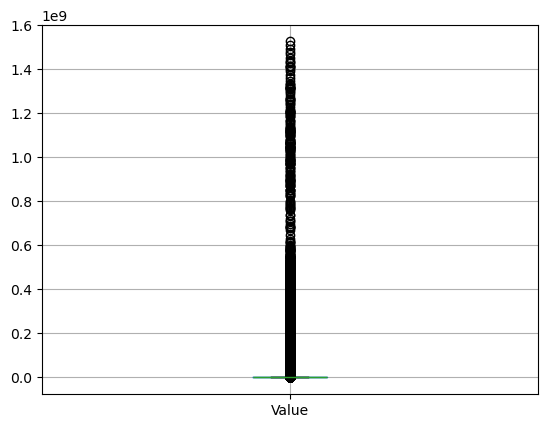

In [1049]:
value_df = value_df.to_frame()
value_boxplot = value_df.boxplot()
plt.show()



In [1050]:
# checking if there is any rows that is not "stocks", it is not, therefore we delete
stocks_df = live_df[live_df['Element'] != 'Stocks']
stocks_df.head()

,Area,Item,Element,Year,Unit,Value


In [1051]:
distinct_country_count = live_df['Area'].nunique()
print(f'Distinct countries: {distinct_country_count}')

Distinct countries: 243


# (Live) Encoding, splitting data in test/train and PCA

In [1052]:
mask = live_df['Unit'] == '1000 Head'  
live_df.loc[mask, 'Value'] = live_df.loc[mask, 'Value'] * 1000  
live_df.loc[mask, 'Unit'] = 'Head' 

In [1053]:
le = LabelEncoder()


live_df['Item'] = le.fit_transform(live_df['Item'])
live_df['Year'] = le.fit_transform(live_df['Year'])
live_df = live_df[['Area','Item', 'Year', 'Value']]
display(live_df)

,Area,Item,Year,Value
0,Afghanistan,0,0,1300000.0
1,Afghanistan,0,1,851850.0
2,Afghanistan,0,2,1001112.0
3,Afghanistan,0,3,1150000.0
4,Afghanistan,0,4,1300000.0
...,...,...,...,...
122453,Net Food Importing Developing Countries,13,55,364166482.0
122454,Net Food Importing Developing Countries,13,56,371357850.0
122455,Net Food Importing Developing Countries,13,57,377303293.0
122456,Net Food Importing Developing Countries,13,58,397970957.0


In [1054]:
scaler = MinMaxScaler()
columns_to_scale = ['Value']
live_df[columns_to_scale] = scaler.fit_transform(live_df[columns_to_scale])

display(live_df)

,Area,Item,Year,Value
0,Afghanistan,0,0,0.000039
1,Afghanistan,0,1,0.000026
2,Afghanistan,0,2,0.000030
3,Afghanistan,0,3,0.000035
4,Afghanistan,0,4,0.000039
...,...,...,...,...
122453,Net Food Importing Developing Countries,13,55,0.010957
122454,Net Food Importing Developing Countries,13,56,0.011174
122455,Net Food Importing Developing Countries,13,57,0.011352
122456,Net Food Importing Developing Countries,13,58,0.011974


In [1055]:
# Define X (features) and y (target)
X = live_df[['Item', 'Year']]  # Features: Item, Year
y = live_df['Value']           # Target: Value

# Create training / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply MinMaxScaler to scale the dataset
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()  # Optionally set n_components to reduce dimensions, e.g., PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Output the explained variance ratio to understand how much variance is explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.5215635 0.4784365]


# (Finland) Encoding, splitting and PCA

In [1056]:
finland_df = live_df[live_df['Area'] == 'Finland']
finland_df.head()

,Area,Item,Year,Value
31607,Finland,1,0,6.017654e-07
31608,Finland,1,1,6.017654e-07
31609,Finland,1,2,5.716771e-07
31610,Finland,1,3,5.716771e-07
31611,Finland,1,4,6.017654e-07


In [1057]:
finland_df = finland_df[['Area','Item_Encoded', 'Year', 'Value']]
finland_df.rename(columns={'Item_Encoded': 'Item'}, inplace=True)

display(finland_df)

KeyError: "['Item_Encoded'] not in index"

In [ ]:
finland_df = finland_df[finland_df['Item'] != 'Chickens']

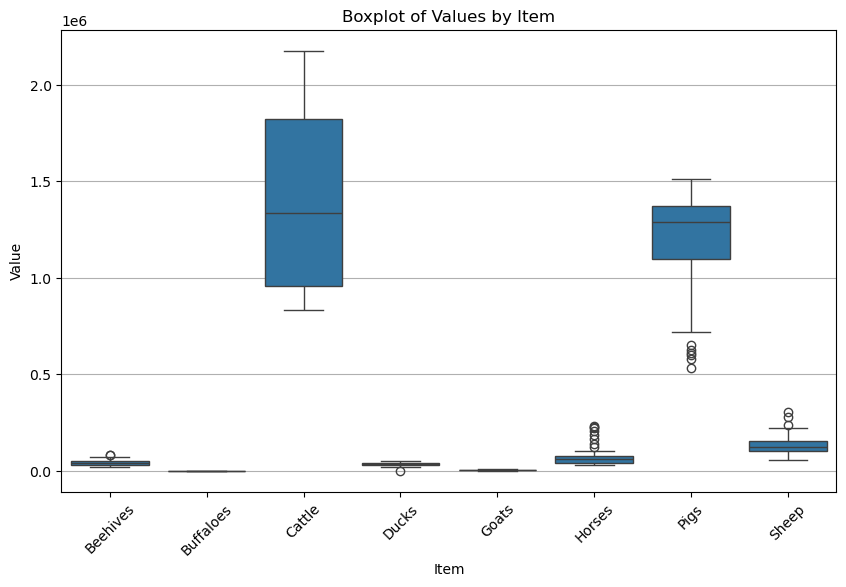

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [ ]:
finland_df = finland_df[finland_df['Year'] >= 1970]

display(finland_df)

,Area,Item,Element,Year,Unit,Value
31616,Finland,Beehives,Stocks,1970,No,22000.0
31617,Finland,Beehives,Stocks,1971,No,22000.0
31618,Finland,Beehives,Stocks,1972,No,30000.0
31619,Finland,Beehives,Stocks,1973,No,30000.0
31620,Finland,Beehives,Stocks,1974,No,30000.0
...,...,...,...,...,...,...
32075,Finland,Sheep,Stocks,2016,Head,156496.0
32076,Finland,Sheep,Stocks,2017,Head,155926.0
32077,Finland,Sheep,Stocks,2018,Head,154999.0
32078,Finland,Sheep,Stocks,2019,Head,144880.0


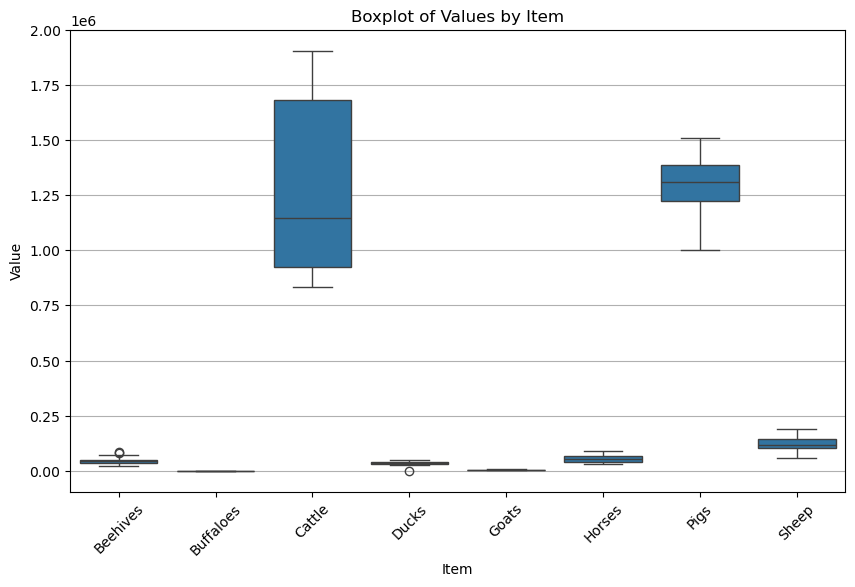

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [ ]:
finland_df['Item'].nunique()

8

In [ ]:
le = LabelEncoder()


finland_df['Item_Encoded'] = le.fit_transform(finland_df['Item'])
finland_df['Year'] = le.fit_transform(finland_df['Year'])
display(finland_df)

,Area,Item,Element,Year,Unit,Value,Item_Encoded
31616,Finland,Beehives,Stocks,0,No,22000.0,0
31617,Finland,Beehives,Stocks,1,No,22000.0,0
31618,Finland,Beehives,Stocks,2,No,30000.0,0
31619,Finland,Beehives,Stocks,3,No,30000.0,0
31620,Finland,Beehives,Stocks,4,No,30000.0,0
...,...,...,...,...,...,...,...
32075,Finland,Sheep,Stocks,46,Head,156496.0,7
32076,Finland,Sheep,Stocks,47,Head,155926.0,7
32077,Finland,Sheep,Stocks,48,Head,154999.0,7
32078,Finland,Sheep,Stocks,49,Head,144880.0,7


In [ ]:
finland_df = finland_df[['Item_Encoded', 'Year', 'Value']]
finland_df.rename(columns={'Item_Encoded': 'Item'}, inplace=True)

display(finland_df)

,Item,Year,Value
31616,0,0,22000.0
31617,0,1,22000.0
31618,0,2,30000.0
31619,0,3,30000.0
31620,0,4,30000.0
...,...,...,...
32075,7,46,156496.0
32076,7,47,155926.0
32077,7,48,154999.0
32078,7,49,144880.0


In [ ]:
scaler = MinMaxScaler()
columns_to_scale = ['Value']
finland_df[columns_to_scale] = scaler.fit_transform(finland_df[columns_to_scale])

display(finland_df)


,Item,Year,Value
31616,0,0,0.011550
31617,0,1,0.011550
31618,0,2,0.015750
31619,0,3,0.015750
31620,0,4,0.015750
...,...,...,...
32075,7,46,0.082159
32076,7,47,0.081860
32077,7,48,0.081373
32078,7,49,0.076060


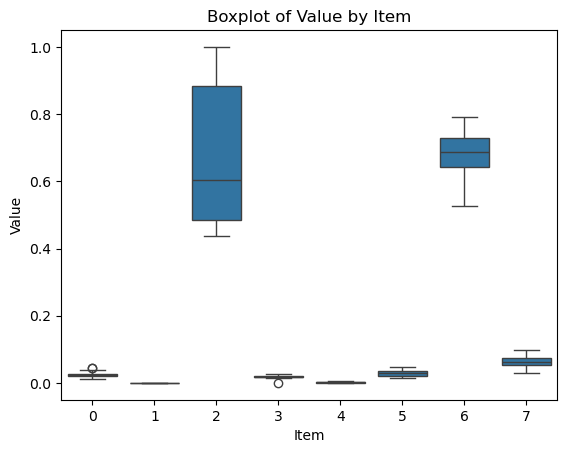

In [ ]:
sns.boxplot(x='Item', y='Value', data=finland_df)


plt.title('Boxplot of Value by Item')
plt.xlabel('Item')
plt.ylabel('Value')


plt.show()

In [ ]:
# Define X (features) and y (target)
X = finland_df[['Item', 'Year']]  # Features: Item, Year
y = finland_df['Value']           # Target: Value

# Create training / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Apply MinMaxScaler to scale the dataset
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()  # Optionally set n_components to reduce dimensions, e.g., PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Output the explained variance ratio to understand how much variance is explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.58543394 0.41456606]
